# MNIST Demo with a simple neural network
In this demo we will train a very simple neural network to recognize handwritten digits from the MNIST dataset. This dataset contains ~100.00 images in a 28x28 format of handwritten digits.

We will use a simple network where input and output layers are directly, and fully connected.

![Network overview](images/d5222c6e3d15770a.png)

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


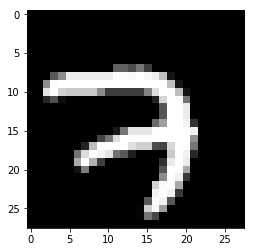

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider

image = mnist.train.images[0].reshape([28,28])
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
import tensorflow as tf

X = tf.placeholder(tf.float32, [None, 28, 28, 1])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

init = tf.global_variables_initializer()

In [4]:
# model
Y = tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 784]), W) + b)

# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 10])

# loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

# % of correct answers found in batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [5]:
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

In [6]:
sess = tf.InteractiveSession()
sess.run(init)

for i in range(1000):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}

    # train
    sess.run(train_step, feed_dict=train_data)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider
import numpy as np

def predict_digit(num):
    
    prediction_fn = tf.argmax(Y,1)
    prediction = sess.run(prediction_fn, feed_dict={X: mnist.test.images[num].reshape(1, 28, 28, 1)})[0]
    prediction_split = sess.run(Y, feed_dict={X: mnist.test.images[num].reshape(1, 28, 28, 1)})[0]
    
    label = mnist.test.labels[num].argmax(axis=0)
    image = mnist.test.images[num].reshape([28,28])
    
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    
    plt.subplot(1, 2, 2)
    plt.xticks(range(0, 10))
    plt.bar(np.arange(10.0), prediction_split, width = 1, color = 'blue')
    
    plt.show()
    
interactive(predict_digit, num=IntSlider(value=0, min=0, max=100, continuous_update=False))

A Jupyter Widget